In [43]:
import sklearn as skl
from sklearn.datasets import fetch_mldata
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import sklearn.datasets as ds
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [44]:
#iris = ds.load_iris()
#print(iris)

(149, 5)
  sepal_length sepal_width petal_length petal_width      species
0          4.9           3          1.4         0.2  Iris-setosa
1          4.7         3.2          1.3         0.2  Iris-setosa
2          4.6         3.1          1.5         0.2  Iris-setosa
3            5         3.6          1.4         0.2  Iris-setosa
4          5.4         3.9          1.7         0.4  Iris-setosa


c:\users\tcollonv\ml36\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


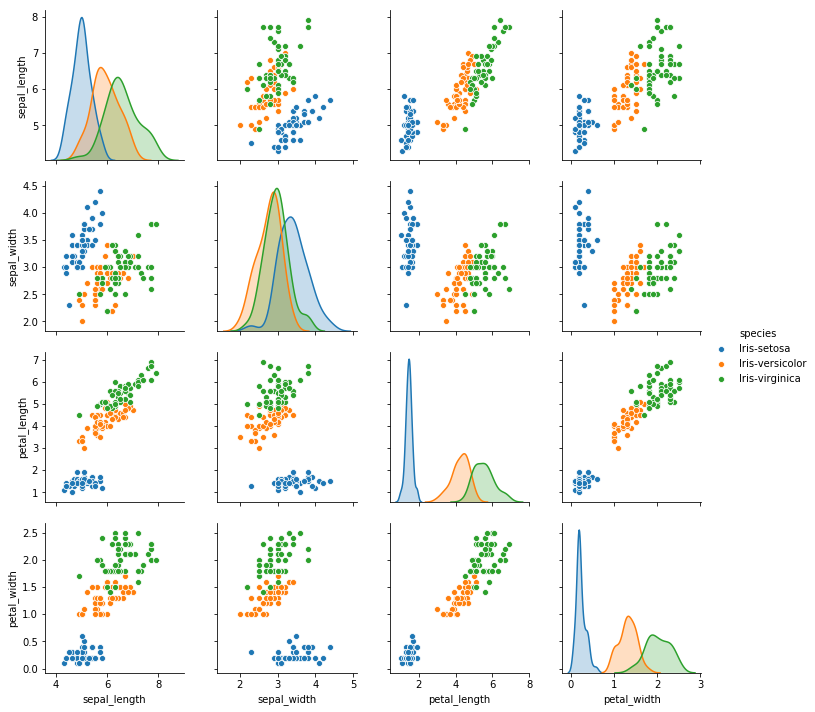

In [45]:
iris= pd.read_csv('iris.data.txt',sep=',') #https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
print(iris.shape)
pandata = pd.DataFrame(np.array(iris),columns=['sepal_length',  'sepal_width',  'petal_length',  'petal_width', 'species'])
print(pandata[:5])
sns.pairplot(pandata,hue='species', size=2.5)


In [46]:
perm=random.permutation(np.array(iris)[:,4].size)
irisRand=np.array(iris)[perm]
targetPerm,dataPerm=irisRand[:,4],irisRand[:,:4]
division=50
print("base:",targetPerm.size,dataPerm.shape)
targetLearn,targetTest=targetPerm[:division],targetPerm[division:]
print("target:",targetLearn.size,targetTest.size)
dataLearn,dataTest=dataPerm[:division,:],dataPerm[division:,:]
print("data:",dataLearn.size,dataTest.shape)

base: 149 (149, 4)
target: 50 99
data: 200 (99, 4)


In [47]:
model=SVC()
model.fit(dataLearn,targetLearn)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [48]:
print(model.predict(dataTest[:4]))
print(targetTest[:4])

['Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor']
['Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor']


In [49]:
#what else? faire une matrice de confusion? histooire d'avoir un peu de quaalité ?
# lire partie issu de cela afin de regarder si je ne peux pas completer avec un peu plus de matiere.

In [50]:
predicData=model.predict(dataTest)
confusion_matrix(targetTest,predicData)

array([[30,  0,  0],
       [ 0, 35,  3],
       [ 0,  0, 31]], dtype=int64)